# This notebook contains:
* Code to plot details of the study domain, using the NOAA topography dataset (ETOPO2V2) and Great Barrier Reef coordinates

In [1]:
# import libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
import matplotlib.patches as mpatches
import shapely
from shapely import geos
import netCDF4
import os
import geopandas
import seaborn as sns
import PIL
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import mpl_toolkits

In [2]:
# Open and regrid ETOPO2V2 dataset
NOAA_ETOPO2V2_ds = xr.open_dataset('/home/563/ac9768/Aus_Bathymetry/ETOPO2v2c_f4.GQp62nWv.nc.part',engine="netcdf4")
NOAA_ETOPO2V2_ds_slice = NOAA_ETOPO2V2_ds.sel(x=slice(140,155),y=slice(-22,-11))
lon = np.linspace(min(NOAA_ETOPO2V2_ds_slice['x'].data), max(NOAA_ETOPO2V2_ds_slice['x'].data), len(NOAA_ETOPO2V2_ds_slice['x'].data))
lat = np.linspace(min(NOAA_ETOPO2V2_ds_slice['y'].data), max(NOAA_ETOPO2V2_ds_slice['y'].data), len(NOAA_ETOPO2V2_ds_slice['y'].data))
lon, lat = np.meshgrid(lon, lat)
topo = NOAA_ETOPO2V2_ds_slice['z'].data

In [4]:
# Open text file with GBR coordinates
GBR_coords_file_path = '/home/563/ac9768/Aus_Bathymetry/GBR_reef_locations.txt'

# Lists to store latitude and longitude pairs
latitudes = []
longitudes = []

# Open the file and read line by line
with open(GBR_coords_file_path, 'r') as file:
    for line in file:
        # Split each line into latitude and longitude
        values = line.split()
        if len(values) == 2:  # Ensure there are exactly two values on each line
            latitude, longitude = map(float, values)
            latitudes.append(latitude)
            longitudes.append(longitude)

# make an array which lists (lon,lat) reef coordinates
gbr_coordinates = np.column_stack((longitudes,latitudes))

# Plot

Text(0, 0.5, 'Latitude')

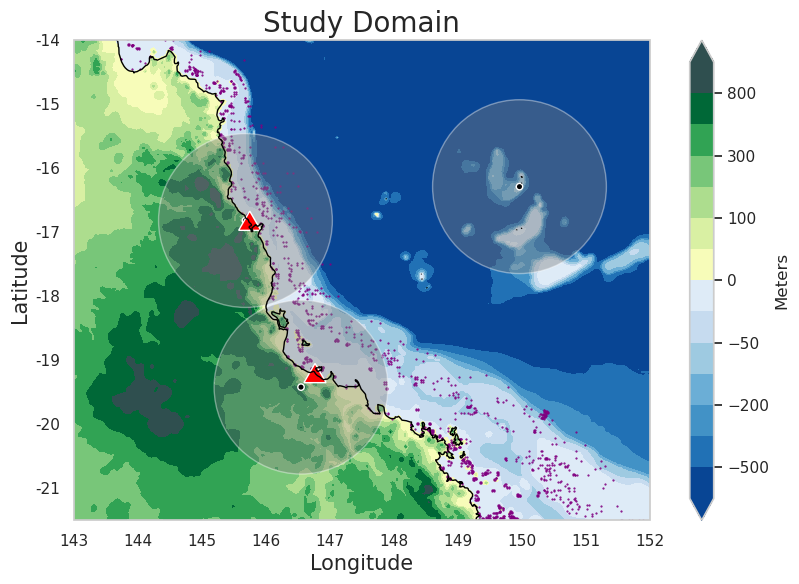

In [23]:
# Plot the study domain

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_xlim([143,152])
ax.set_ylim([-21.5,-14])
# color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#006837', '#31a354', '#78c679',
         # '#addd8e', '#d9f0a3', '#f7fcb9', '#d7ccca', '#ad9591', '#c9bc87', '#a69165', '#856b49', '#664830']
color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fcb9','#d9f0a3','#addd8e',
         '#78c679','#31a354','#006837','darkslategrey','#d7ccca']#'#ad9591']#, '#c9bc87']#, '#a69165', '#856b49', '#664830']
levels = [-800, -500, -300, -200, -100, -50, -25, 0, 50, 100, 200, 300, 500, 800, 1000]
cs = ax.contourf(lon,lat,topo,levels=levels,extend="both",colors=color)
cb = plt.colorbar(cs,aspect=20,orientation='vertical',ax=ax)

# plot gbr locations
ax.scatter(gbr_coordinates[:, 0], gbr_coordinates[:, 1], color='purple', marker='o',s=0.3)

# plot radar coverage
circle_T = mpatches.Circle((146.5509,-19.4198),1.358,alpha=0.4,fc="grey") # Townsville
circle_C = mpatches.Circle((145.683,-16.817),1.358,alpha=0.4,fc="grey") # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),1.358,alpha=0.4,fc="grey") # Willis Island
ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W)
circle_T_center = mpatches.Circle((146.5509,-19.4198),0.05,alpha=1,fc="black") # Townsville
circle_C_center = mpatches.Circle((145.683,-16.817),0.05,alpha=1,fc="black") # Cairns
circle_W_center = mpatches.Circle((149.9646,-16.2874),0.05,alpha=1,fc="black") # Willis Island
ax.add_patch(circle_T_center)
ax.add_patch(circle_C_center)
ax.add_patch(circle_W_center)

# plot station coordinates
circle_T_station = mpatches.RegularPolygon((146.77,-19.25), numVertices=3,radius=0.2,alpha=1,fc="red") # Townsville station
circle_C_station = mpatches.RegularPolygon((145.75,-16.87), numVertices=3,radius=0.2,alpha=1,fc="red") # Cairns station
ax.add_patch(circle_T_station)
ax.add_patch(circle_C_station)

# other plot details
cb.set_label("Meters")
ax.set_title("Study Domain",fontsize=20)
ax.set_xticks([143,144,145,146,147,148,149,150,151,152])
ax.set_xticklabels([143,144,145,146,147,148,149,150,151,152])
ax.set_yticks([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_yticklabels([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15)

Text(149.2, -16.2, 'Willis Island')

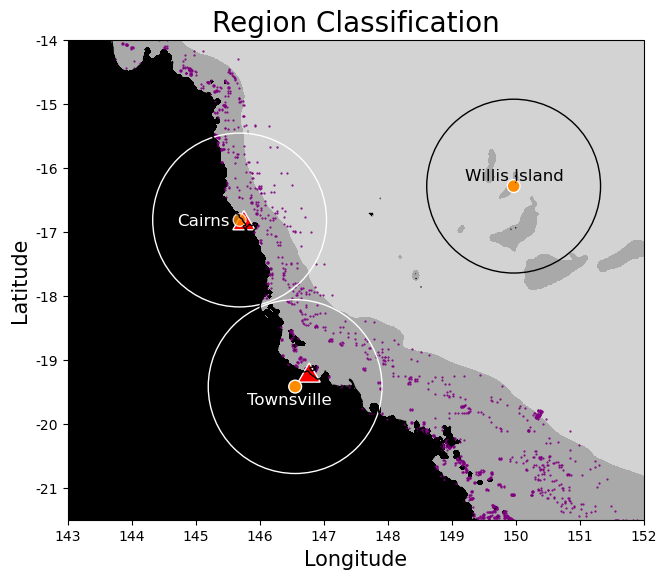

In [7]:
# Plot a map of the region classifications
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())
ax.coastlines()
sns.set_theme(style="whitegrid")
# color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#006837', '#31a354', '#78c679',
         # '#addd8e', '#d9f0a3', '#f7fcb9', '#d7ccca', '#ad9591', '#c9bc87', '#a69165', '#856b49', '#664830']
color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fcb9','#d9f0a3','#addd8e',
         '#78c679','#31a354','#006837','darkslategrey','#d7ccca']#'#ad9591']#, '#c9bc87']#, '#a69165', '#856b49', '#664830']
levels = [-8000, -6000, -4000, -2000, -1000, -200, -50, 0, 50, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
levels = [-800, -500, -300, -200, -100, -50, -25, 0, 50, 100, 200, 300, 500, 800, 1000]
# levels = [-6000, -4000, -2000, -1000, -200, -50,-25, 0, 50, 200, 500, 1000, 1500, 
#           2000]
# cs = ax.contourf(lon,lat,topo,levels=levels,extend="both",colors=color)
colors = ["white","lightgrey","darkgrey","black"]
cs = ax.contourf(lon,lat,topo,levels=[-8000,-150,0],extend="both",colors=colors)

# cb = plt.colorbar(cs,aspect=20,orientation='vertical',ax=ax)
# cb.set_label("Meters")
ax.set_title("Region Classification",fontsize=20)
ax.set_xlim([143,152])
ax.set_xticks([143,144,145,146,147,148,149,150,151,152])
ax.set_xticklabels([143,144,145,146,147,148,149,150,151,152])
ax.set_ylim([-21.5,-14])
ax.set_yticks([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_yticklabels([-21,-20,-19,-18,-17,-16,-15,-14])
circle_T_center = mpatches.Circle((146.5509,-19.4198),0.1,alpha=1,fc="darkorange") # Townsville 
circle_C_center = mpatches.Circle((145.683,-16.817),0.1,alpha=0.8,fc="darkorange") # Cairns 
circle_W_center = mpatches.Circle((149.9646,-16.2874),0.1,alpha=1,fc="darkorange") # Willis Island 
circle_T_station = mpatches.RegularPolygon((146.77,-19.25), numVertices=3,radius=0.2,alpha=1,fc="red") # Townsville station
circle_C_station = mpatches.RegularPolygon((145.75,-16.87), numVertices=3,radius=0.2,alpha=1,fc="red") # Cairns station
# circle_T = mpatches.Circle((146.5509,-19.4198),1.358,alpha=0,fc="grey") # Townsville
circle_T = mpatches.Circle((146.5509,-19.4198),1.358,fc=None,edgecolor="white",linewidth=1, fill=None)
# circle_C = mpatches.Circle((145.683,-16.817),1.358,alpha=0.4,fc="grey") # Cairns
circle_C = mpatches.Circle((145.683,-16.817),1.358,fc=None,edgecolor="white",linewidth=1, fill=None) # Cairns
# circle_W = mpatches.Circle((149.9646,-16.2874),1.358,alpha=0.4,fc="grey") # Willis Island
circle_W = mpatches.Circle((149.9646,-16.2874),1.358,fc=None,edgecolor="black",linewidth=1, fill=None) # Willis Island

# plot gbr locations
ax.scatter(gbr_coordinates[:, 0], gbr_coordinates[:, 1], color='purple', marker='o',s=0.3)
c_radar = np.arange(144.35,147.5,1)
# c_radar_lat = []
# for i in c_radar:
#     c_radar_lat.append(-17.3)
# plt.plot(c_radar,c_radar_lat,color='darkorange')
# circle_T_barra = mpatches.Circle((146.77,-19.25),0.1,alpha=0.9,fc="yellow") # Townsville
# circle_C_barra = mpatches.Circle((145.75,-16.817),0.1,alpha=0.9,fc="yellow") # Cairns -16.9,-16.7,145.7,145.8

ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W)

# ax.add_patch(circle_T_barra)
# ax.add_patch(circle_C_barra)
ax.add_patch(circle_T_station)
ax.add_patch(circle_C_station)
ax.add_patch(circle_T_center)
ax.add_patch(circle_C_center)
ax.add_patch(circle_W_center)
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15) 
ax.annotate("Townsville",(145.8,-19.7),color='white',fontsize=12)
ax.annotate("Cairns",(144.7,-16.9),color='white',fontsize=12)
ax.annotate("Willis Island",(149.2,-16.2),color='black',fontsize=12)

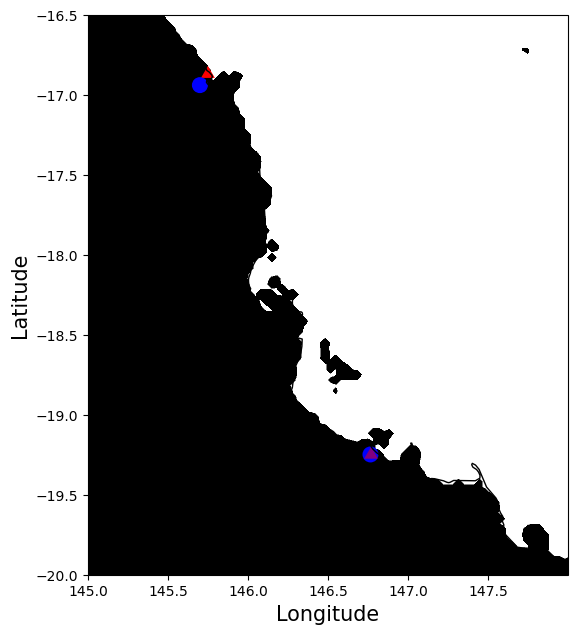

In [6]:
# Plot a figure indicating the automated weather stations (red triangles) and BARRA-2 point comparisons
fig = plt.figure(figsize=(6,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())
ax.coastlines()
cs = ax.contourf(lon,lat,topo,levels=[-1,0],extend="both",cmap="binary")
patch1=mpatches.Circle((145.7,-16.94),0.05,alpha=1,fc="blue")
circle_T_station = mpatches.RegularPolygon((146.77,-19.25), numVertices=3,radius=0.05,alpha=0.5,fc="red") # Townsville station
circle_C_station = mpatches.RegularPolygon((145.75,-16.87), numVertices=3,radius=0.05,alpha=1,fc="red")
ax.add_patch(circle_C_station)
ax.add_patch(patch1)
patch4=mpatches.Circle((146.7661,-19.2483),0.05,alpha=1,fc="blue")
ax.add_patch(patch4)
ax.add_patch(circle_T_station)

ax.set_xlim(145,148)
ax.set_ylim(-20,-16.5)
ax.set_xticks(np.arange(145,148,0.5))
ax.set_yticks(np.arange(-20,-16,0.5))
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15);